# Gradient descent implemented in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

## Set-up
To find the minimum of $100(x_1^2 - x_2)^2 + (x_1 - 1)^2$

C:\Users\maoja\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


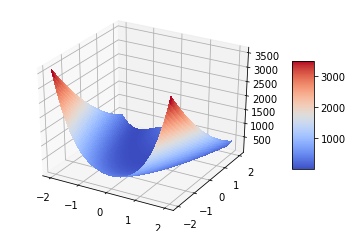

In [2]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
x, y = np.meshgrid(x, y)
z = 100 * np.square(x*x - y) + np.square(x - 1)
fig = plt.figure()
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = cm.coolwarm, linewidth = \
                      0, antialiased = False)
fig.colorbar(surf, shrink = 0.5, aspect = 5)
fig.show()

## Gradient descent algorithm

In [3]:
def func(x):
    return 100*np.square(x[0]*x[0] - x[1]) + np.square(x[0] - 1)


# First-order derivatives of the function
def dfunc(x):
    df1 = 400*x[0]*(x[0]*x[0] - x[1]) + 2*(x[0] - 1)
    df2 = -200*(x[0]*x[0] - x[1])
    return np.array([df1, df2])


def grad(x, max_int):
    miter = 1
    step = .0001/miter
    vals = []
    objectfs = []
    while miter <= max_int:
        vals.append(x)
        objectfs.append(func(x))
        temp = x - step*dfunc(x)
        if np.abs(func(temp) - func(x)) > 0.0001:
            x = temp
        else:
            break
        print(x, func(x), miter)
        miter += 1
    return vals, objectfs, miter

## Testing

[0.9992 5.4   ] 1937.4076932352416 1
[1.17512328 5.31196801] 1545.3486587826624 2
[1.35986715 5.23334695] 1145.3483938946076 3
[1.54387268 5.16566478] 774.3160368917922 4
[1.71557359 5.11002234] 470.0270987692811 5
[1.8641247  5.06668575] 254.1055126835174 6
[1.98263882 5.03485125] 122.84597900325505 7
[2.06999519 5.01277136] 54.127460033900505 8
[2.13005045 4.99821354] 22.538207813017163 9
[2.16911097 4.98899156] 9.429532738570803 10
[2.19351384 4.98331258] 4.376329814634371 11
[2.20834981 4.97987639] 2.522400568669064 12
[2.2172125  4.97781504] 1.863329534402812 13
[2.22244857 4.97657936] 1.6335223512808446 14
[2.22552013 4.97583333] 1.5543108119816416 15
[2.22731302 4.97537546] 1.5271837782347222 16
[2.22835514 4.97508642] 1.5179189986236106 17
[2.22895801 4.97489602] 1.5147496993216207 18
[2.22930442 4.97476318] 1.5136544497478168 19
[2.2295013  4.97466388] 1.513263725525059 20
[2.22961103 4.97458412] 1.5131120843735781 21


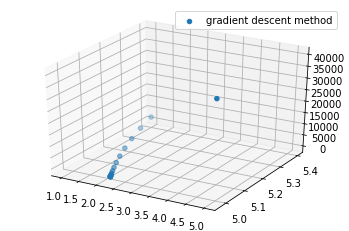

In [4]:
start = [5, 5]
val, objectf, iters = grad(start, 100)

x = np.array([i[0] for i in val])
y = np.array([i[1] for i in val])
z = np.array(objectf)
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(x, y, z, label = 'gradient descent method')
ax.legend()
plt.show()